<a href="https://colab.research.google.com/github/keerthikapopuri/sparks-foundation-internship/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv('Iris.csv')
df.drop(['Id'],axis=1,inplace=True)
df.info()
df.describe()
df.drop_duplicates(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109321,0.871305,0.817058,0.782904
SepalWidthCm,-0.109321,1.000000,-0.421057,-0.356376,-0.418348
PetalLengthCm,0.871305,-0.421057,1.000000,0.961883,0.948339
PetalWidthCm,0.817058,-0.356376,0.961883,1.000000,0.955693
Species,0.782904,-0.418348,0.948339,0.955693,1.000000


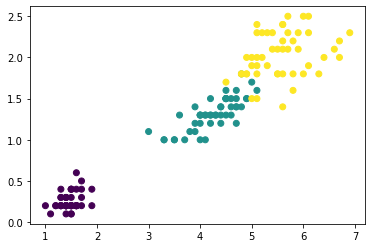

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])
df['Species'].value_counts()
plt.scatter(df['PetalLengthCm'],df['PetalWidthCm'],c=df.Species.values)
df.corr()

# **Data Visualization**

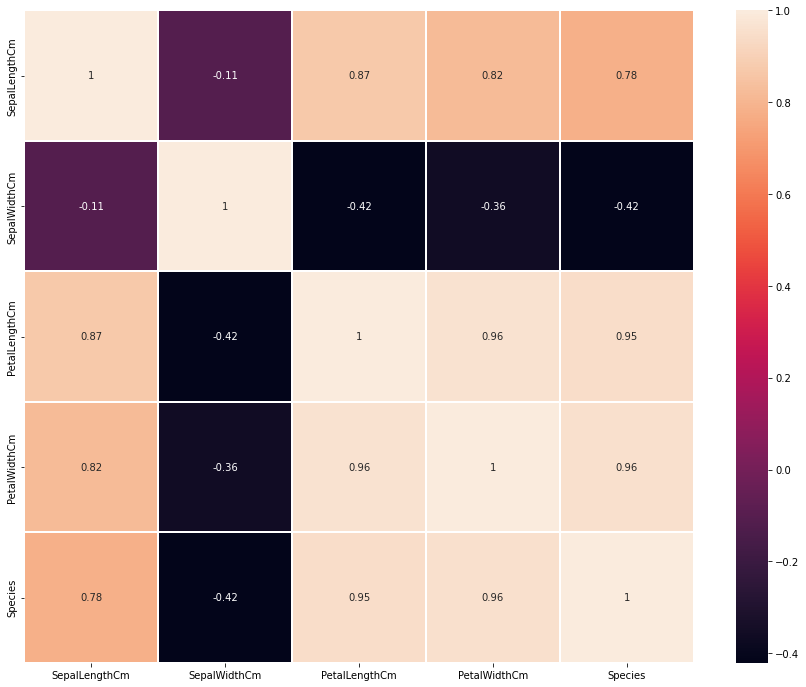

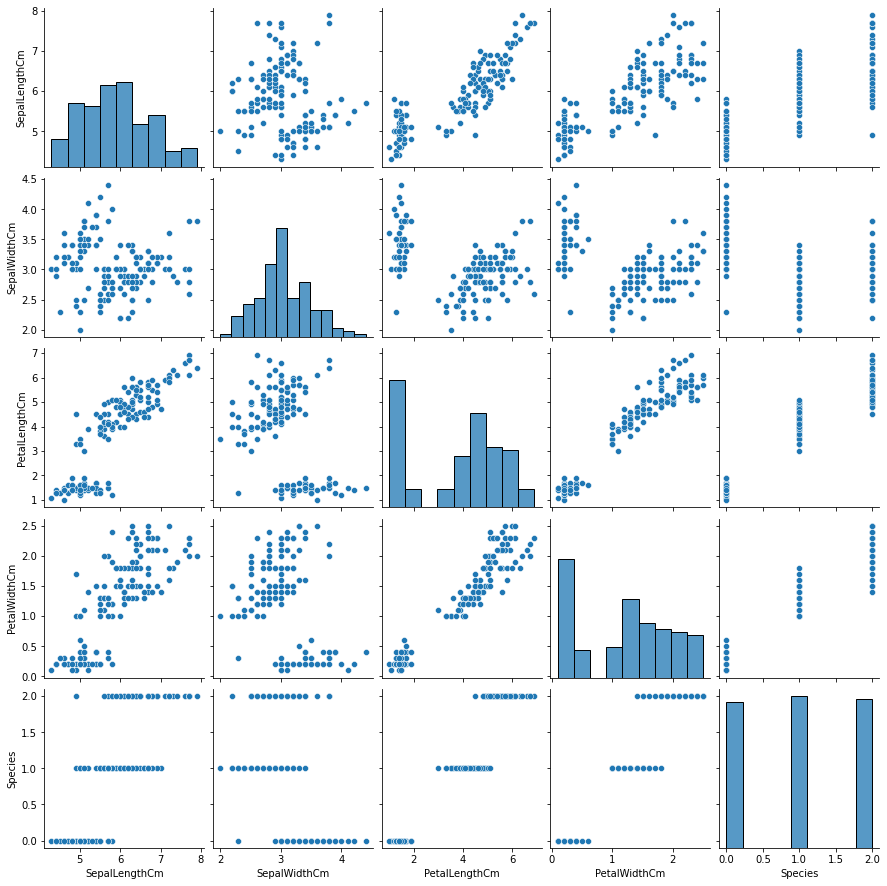

In [8]:
fig=plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),linewidths=1,annot=True)
sns.pairplot(df)
df=df.iloc[:,[0,1,2,3]].values

# **Elbow Method using within-cluster-sum-of-squares(wcss)**

In [9]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)
    
wcss

[663.895238095238,
 151.77145833333333,
 77.91989035087718,
 56.64237065018315,
 45.81642192982456,
 38.380978808131445,
 34.117070947570944,
 29.758015809726338,
 27.74499792038028,
 25.769652682285034]

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


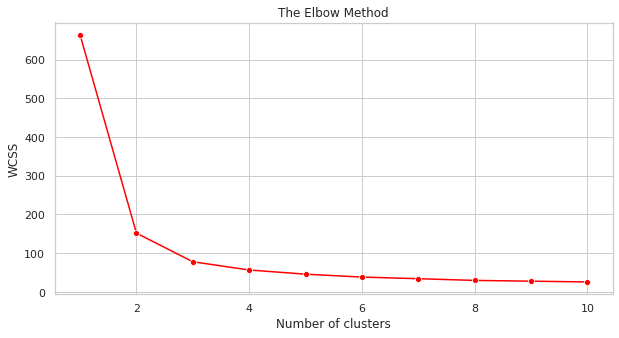

In [10]:
plt.figure(figsize=(10,5))
sns.set(style='whitegrid')
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [11]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 5)
y_kmeans = kmeans.fit_predict(df)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

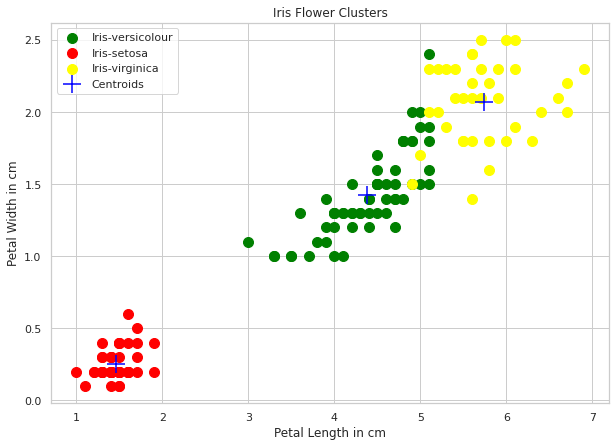

In [13]:
fig = plt.figure(figsize=(10, 7))
plt.title('Clusters with Centroids',fontweight ='bold', fontsize=20)
plt.scatter(df[y_kmeans == 0, 2], df[y_kmeans == 0, 3], s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(df[y_kmeans == 1, 2], df[y_kmeans == 1, 3], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(df[y_kmeans == 2, 2], df[y_kmeans == 2, 3],s = 100, c = 'yellow', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s = 300, c = 'blue',marker='+', 
            label = 'Centroids')
plt.title('Iris Flower Clusters')
plt.ylabel('Petal Width in cm')
plt.xlabel('Petal Length in cm')
plt.legend()